## Bagging

### Load data and libraries

In [ ]:
library(caret)
install.packages("e1071")
install.packages("randomForest")
library(randomForest)
options(warn=-1)

In [ ]:
source ("cruzadas avnnet y log binaria.R")
source ("cruzada arbolbin.R")
source ("cruzada rf binaria.R")

In [6]:
load("data.Rda")
head(data)


,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


### Tuneado ntree

In [7]:
#Bagging
#Decidir mínimo número de trees

set.seed(40)

rf1<-randomForest(factor(outcome)~
           hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
           data=data,
           mtry=9,
           ntree=20000,
           sampsize=200,       
           nodesize=10,
           replace=TRUE)
rf1




Call:
 randomForest(formula = factor(outcome) ~ hosp_y + highbp_nk +      age + angina_nk + angina_y + smstat_nk + yronset + stroke_y +      stroke_nk, data = data, mtry = 9, ntree = 20000, sampsize = 200,      nodesize = 10, replace = TRUE) 
               Type of random forest: classification
                     Number of trees: 20000
No. of variables tried at each split: 9

        OOB estimate of  error rate: 12.06%
Confusion matrix:
      No  Yes class.error
No  3463   62  0.01758865
Yes  706 2136  0.24841661

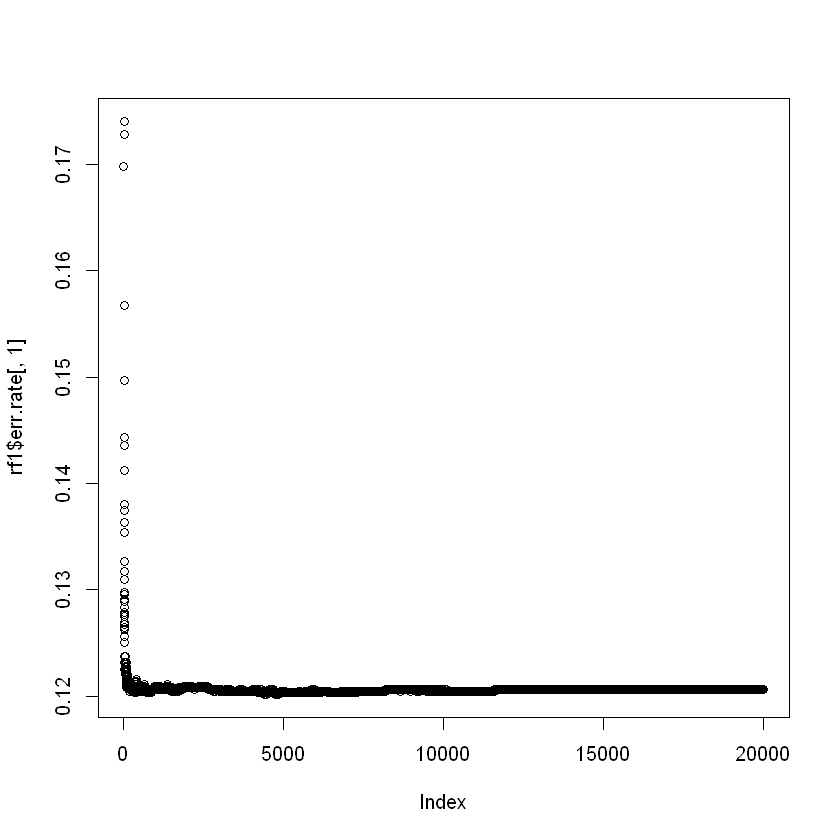

In [8]:
plot(rf1$err.rate[,1])

El error se estabiliza a menos de 3000 submuestras, con lo que podemos colocar 3000 como valor base de ntree. Aunque es un valor ciertamente alto, se aprecian variaciones en la curva que creo quedan estabilizadas a partir de ese valor.

### Tuneado sampsize

Tenemos 6367 observaciones, con 10 grupos de CV , tendremos que el mayor número de observacionesnes será 0,9*6367=5730 es el tamaño máximo que podemos probar

In [ ]:
source ("cruzada rf binaria.R")

In [12]:
#Tuneado con validación cruzada repetida el tamaño de muestra sampsize en bagging

medias1<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=500)

  medias1$modelo="bagging500"



  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8783012 0.7482824 0.01133885 0.02388527


In [27]:
head(medias1)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1228208,0.9144526,bagging500
2,0.1217214,0.9161955,bagging500
3,0.1226637,0.9155778,bagging500
4,0.1217214,0.9145295,bagging500
5,0.1220355,0.9149492,bagging500
6,0.1207790,0.9151378,bagging500


In [13]:

medias2<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=1000)

  medias2$modelo="bagging1000"



  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8767704 0.7453389 0.01112363 0.02343747


In [28]:
head(medias2)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1236061,0.9121190,bagging1000
2,0.1240773,0.9135906,bagging1000
3,0.1229779,0.9137922,bagging1000
4,0.1245485,0.9125843,bagging1000
5,0.1237632,0.9134998,bagging1000
6,0.1223496,0.9123811,bagging1000


In [14]:

medias3<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=1500)

  medias3$modelo="bagging1500"


  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8760246 0.7439781 0.01109856 0.02337216


In [29]:
head(medias3)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1231349,0.9104070,bagging1500
2,0.1248626,0.9118638,bagging1500
3,0.1247055,0.9123075,bagging1500
4,0.1245485,0.9107591,bagging1500
5,0.1251767,0.9118476,bagging1500
6,0.1237632,0.9107080,bagging1500


In [15]:

medias4<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=2500)

  medias4$modelo="bagging2500"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8745561 0.7411811  0.0115064 0.02411259


In [30]:
head(medias4)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1240773,0.9087716,bagging2500
2,0.1248626,0.9094112,bagging2500
3,0.1264332,0.9100631,bagging2500
4,0.1245485,0.9084079,bagging2500
5,0.1262761,0.9094881,bagging2500
6,0.1258049,0.9077840,bagging2500


In [16]:

medias5<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=3000)

  medias5$modelo="bagging3000"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8738256 0.7397483 0.01170324 0.02452295


In [31]:
head(medias5)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1243914,0.9076371,bagging3000
2,0.1265902,0.9086100,bagging3000
3,0.1265902,0.9092012,bagging3000
4,0.1258049,0.9073806,bagging3000
5,0.1281608,0.9089860,bagging3000
6,0.1261191,0.9069364,bagging3000


In [17]:

medias6<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=4000)

  medias6$modelo="bagging4000"

  mtry  Accuracy    Kappa AccuracySD    KappaSD
1    9 0.8725846 0.737327 0.01178552 0.02465361


In [32]:
head(medias6)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1262761,0.9064615,bagging4000
2,0.1265902,0.9072286,bagging4000
3,0.1270614,0.9078513,bagging4000
4,0.1258049,0.9058207,bagging4000
5,0.1306738,0.9076150,bagging4000
6,0.1280038,0.9057153,bagging4000


In [18]:

medias7<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=5000)

  medias7$modelo="bagging5000"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8716342 0.7354724 0.01199224 0.02506131


In [33]:
head(medias7)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1273755,0.9055083,bagging5000
2,0.1269044,0.9058439,bagging5000
3,0.1284749,0.9065219,bagging5000
4,0.1254908,0.9051176,bagging5000
5,0.1314591,0.9065119,bagging5000
6,0.1286320,0.9051923,bagging5000


In [19]:

medias8<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE)

  medias8$modelo="bagging_base"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8709037 0.7340391 0.01198496 0.02502476


In [34]:
head(medias8)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1287891,0.9050493,bagging_base
2,0.1280038,0.9053695,bagging_base
3,0.1289461,0.9066634,bagging_base
4,0.1264332,0.9043010,bagging_base
5,0.1325585,0.9063322,bagging_base
6,0.1284749,0.9043221,bagging_base


In [38]:

medias9<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias9$modelo="bagging100"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    9 0.8789381 0.7494889 0.01103148 0.02333901


In [39]:
head(medias9)

,tasa,auc,modelo
,<dbl>,<dbl>,<chr>
1,0.1212502,0.9171042,bagging100
2,0.1201508,0.9171696,bagging100
3,0.1206220,0.9171732,bagging100
4,0.1214073,0.9170989,bagging100
5,0.1206220,0.9167513,bagging100
6,0.1207790,0.9171067,bagging100


In [40]:
union1<-rbind(medias1,medias2,medias3,medias4,medias5,medias6,medias7,medias8,medias9)

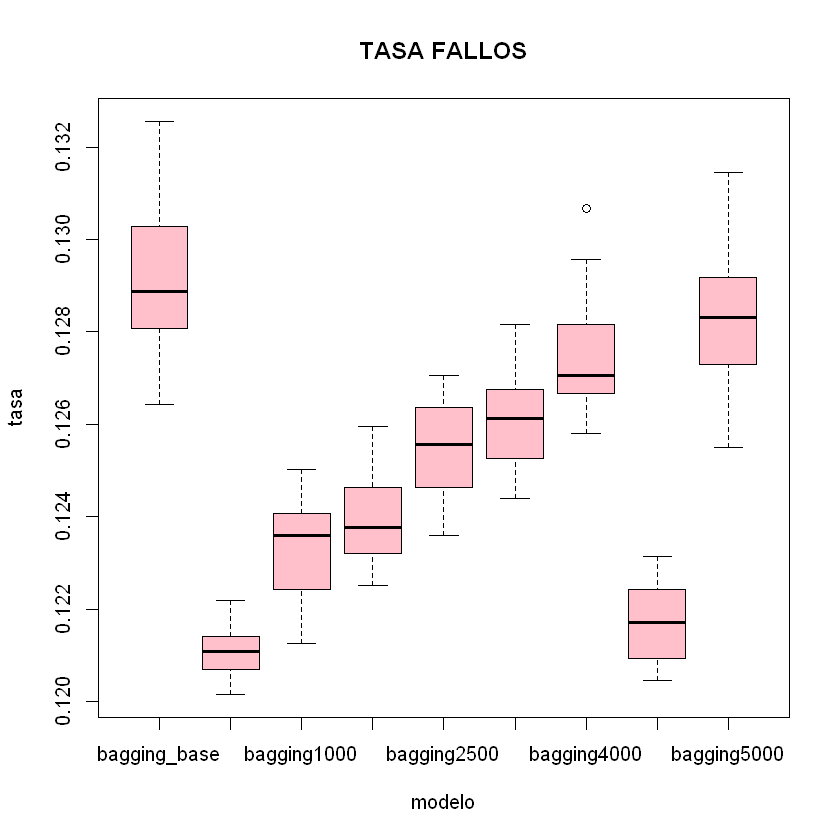

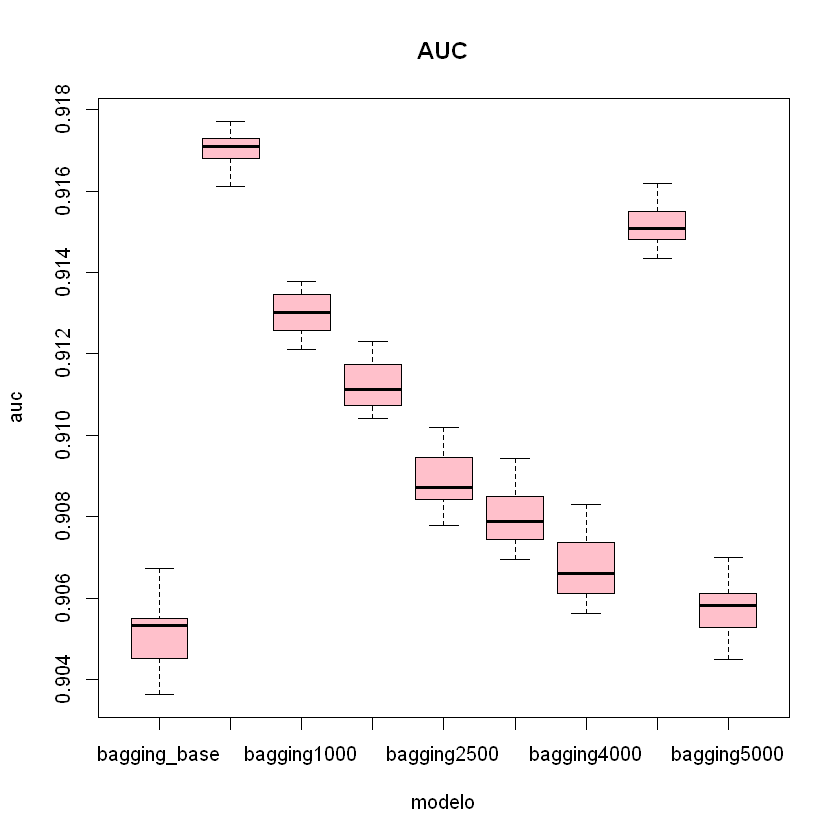

In [41]:
par(cex.axis=1.0)
#boxplot(data=union1, tasa~modelo, modelo,main="TASA FALLOS", col="pink")
#par(cex.axis=1.0)
boxplot(data=union1,tasa~modelo,main="TASA FALLOS",col="pink")
boxplot(data=union1,auc~modelo,main="AUC",col="pink")


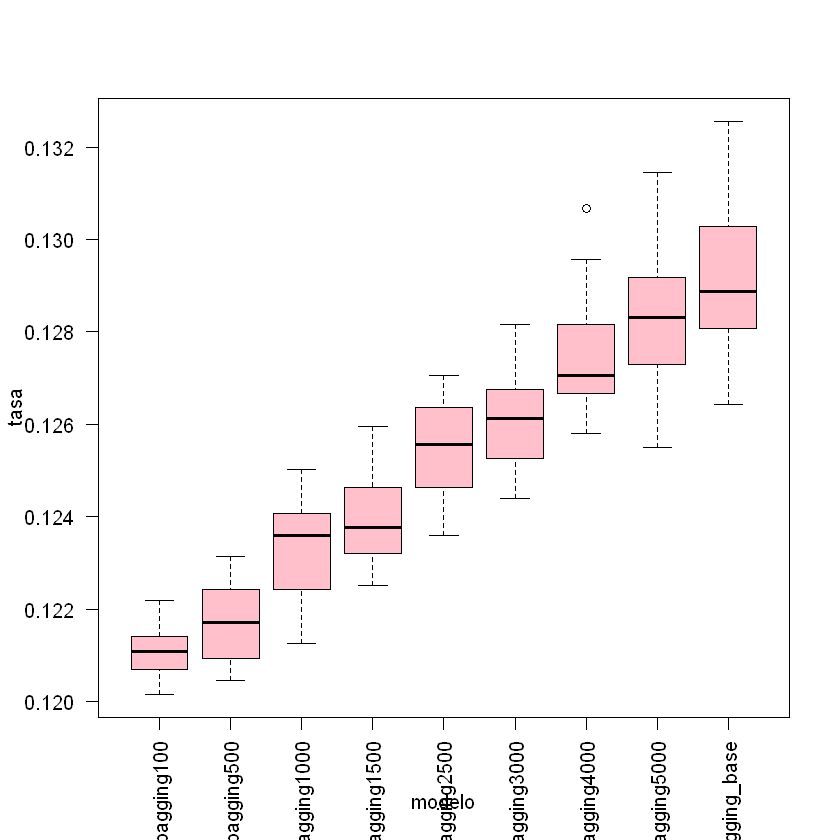

In [42]:
uni<-union1
uni$modelo<- with(uni, reorder(modelo,tasa,mean))
par(cex.axis=1, las=2)
boxplot(data=uni,tasa~modelo,col="pink")

El valor de sampsize que se ha optimizado es 100. Con este valor se procede a seleccionar el modelo de bagging que mejor resultado ha dado.

Se valida el modelo con los parámetros resultantes del tuneado mediante validación cruzada.

In [45]:

set.seed(40)
rfgrid<-expand.grid(mtry=c(9))#nº total variables del modelo por ser bagging

control<-trainControl(method = "cv",number=10,savePredictions = "all",
 classProbs=TRUE) 

rf1<- train(factor(outcome)~
           hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
           data=data,
           method="rf",
           trControl=control,
           tuneGrid=rfgrid,
           linout = FALSE,
           #mtry = 9, 
           ntree=3000,# valor iteraciones que el error queda estabilizado 
           nodesize=10,
           replace=TRUE,
           importance=TRUE,
           sampsize=100)


In [46]:
rf1

Random Forest 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results:

  Accuracy   Kappa    
  0.8785911  0.7488652

Tuning parameter 'mtry' was held constant at a value of 9

### Comparación de modelos

In [13]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"


In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

In [ ]:
#Dando medias_2$modelo="avnnet" el siguiente resultado:
#size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
#1    5 0.001 FALSE 0.8767774 0.7450545 0.01110455 0.02346587

In [15]:
#mejor modelo de árbol
medias_3<-cruzadaarbolbin(data=data,
                     vardep="outcome",
                     listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                     listclass=c(""),
                     grupos=10,
                     sinicio=1234,
                     repe=5,
                     cp=c(0),
                     minbucket =40)

medias_3$modelo="arbol"

  cp  Accuracy     Kappa AccuracySD    KappaSD
1  0 0.8720909 0.7362186 0.01168732 0.02436023


In [11]:
#mejor modelo de bagging
  medias_4<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias_4$modelo="bagging"


  mtry  Accuracy    Kappa  AccuracySD   KappaSD
1    9 0.8790632 0.749648 0.007291974 0.0154251


In [16]:
union3<-rbind(medias_1,medias_2,medias_3,medias_4)

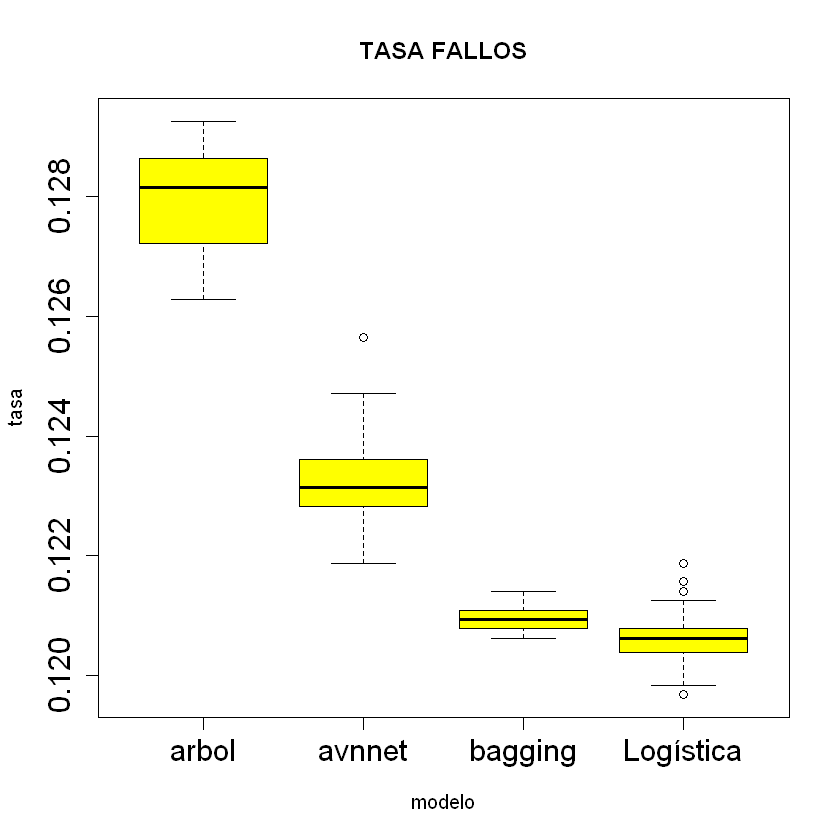

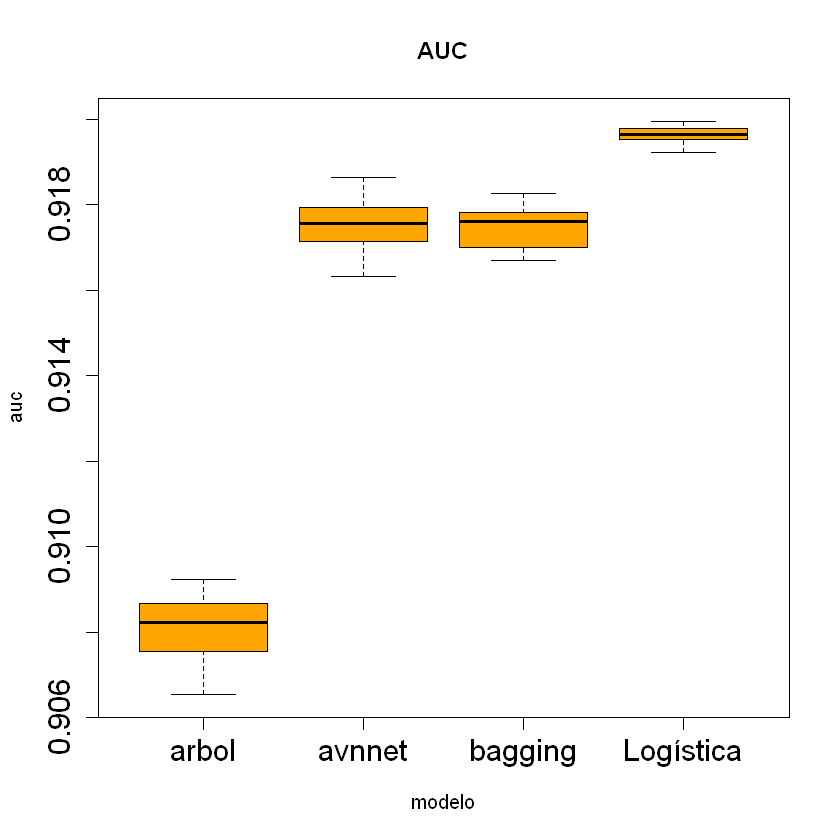

In [17]:
par(cex.axis=1.5)
boxplot(data=union3,tasa~modelo,main="TASA FALLOS",col="yellow")
boxplot(data=union3,auc~modelo,main="AUC",col="orange")

### Modelo ganador

Se aprecia como el bagging es un modelo modelo muy competitivo, que ha superado a la red neuronal en tasa de fallos y se mantiene en AUC con la red neuronal aunque con menos variabilidad que ésta lo que hace del bagging un mejor modelo. No obstante no supera la capacidad predictiva de la regresión logistica, que presenta mejores resultados y se consolida como el mejor modelo hasta el momento.